In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import copy
import seaborn as sns
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import wilcoxon
from scipy.optimize import curve_fit
from scipy.stats import fisher_exact
from scipy import stats

hfont = {'fontname':'Arial'}
plt.rcParams["font.family"] = "Arial"

#Code borrowed heavily from here: https://stackoverflow.com/questions/62375034/find-non-overlapping-area-between-two-kde-plots
plt.rcParams.update(
    {"text.usetex": False}
)


C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("G250.MskHum.PhyloP.bins.txt", sep = "\t", header = None)
df

,0,1
0,72706,-20.0:-19.898196666666667
1,0,-19.898196666666667:-19.796393333333334
2,0,-19.796393333333334:-19.69459
3,0,-19.69459:-19.592786666666665
4,0,-19.592786666666665:-19.490983333333332
...,...,...
295,181189,10.031983333333333:10.133786666666666
296,265249,10.133786666666666:10.235589999999998
297,485695,10.235589999999998:10.337393333333331
298,992245,10.337393333333331:10.439196666666664


<Axes: xlabel='Bin edge 1', ylabel='Counts'>

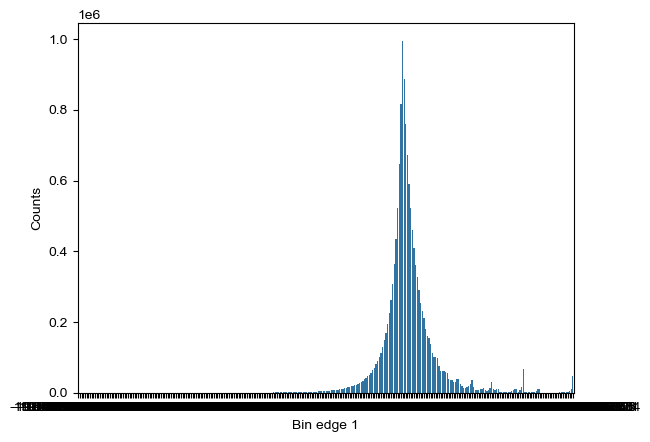

In [3]:
df = pd.read_csv("G250.MskHum.PhyloP.bins.txt", sep = "\t", header = None)
df[0] = df[0]//100
df.columns = ['Counts', 'Bins']
df["Bin edge 1"] = [i.split(":")[0] for i in df["Bins"]]
sns.barplot(data = df, y = 'Counts', x = "Bin edge 1")


In [4]:
#Implies we want 79.3% of variants to be neutral
neutral_prop = np.sum(df[df["Bin edge 1"].astype(float) <= 1]["Counts"])/np.sum(df["Counts"].astype(int))
neutral_prop

0.7980797077737684

In [10]:
extremely_weak_prop = np.sum(df[(df["Bin edge 1"].astype(float) > 1) & (df["Bin edge 1"].astype(float) <= 2)]["Counts"])/np.sum(df["Counts"].astype(int))
very_weak_prop = np.sum(df[(df["Bin edge 1"].astype(float) > 2) & (df["Bin edge 1"].astype(float) <= 3)]["Counts"])/np.sum(df["Counts"].astype(int))
weakly_weak_prop = np.sum(df[(df["Bin edge 1"].astype(float) > 3) & (df["Bin edge 1"].astype(float) <= 4)]["Counts"])/np.sum(df["Counts"].astype(int))
weak_prop = np.sum(df[(df["Bin edge 1"].astype(float) > 4) & (df["Bin edge 1"].astype(float) <= 5)]["Counts"])/np.sum(df["Counts"].astype(int))

print(round(extremely_weak_prop, 3), round(very_weak_prop, 2), round(weakly_weak_prop, 2), round(weak_prop, 2))

0.11 0.04 0.02 0.01


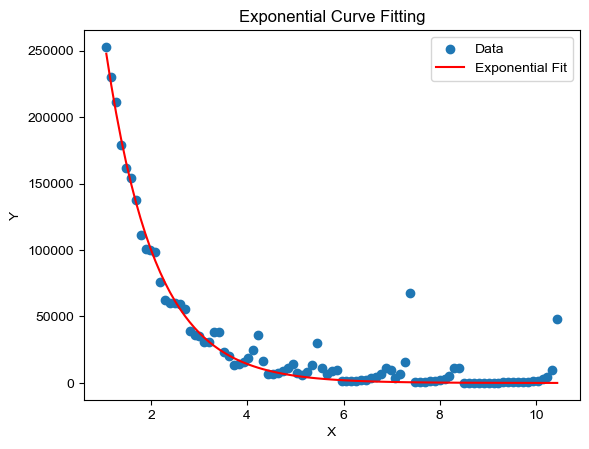

In [30]:
#Testing what the distribution looks like

from scipy.optimize import curve_fit

# Sample data
y_data = np.array(df2["Counts"])
x_data = np.array(df2["Bin edge 1"].astype(float))

# Define the exponential function
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# Fit the curve
params, covariance = curve_fit(exponential_func, x_data, y_data)

a, b = params

# Generate fitted data
y_fit = exponential_func(x_data, a, b)

# Plot the data and the fit
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, y_fit, label='Exponential Fit', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Exponential Curve Fitting')
plt.show()

In [31]:
#Get the data to fit
df3 = df2[df2["Bin edge 1"].astype(float) < 5]
data = []
for index, row in df3.iterrows():
    data = data + list(np.repeat(float(row["Bin edge 1"]), row["Counts"]))

In [33]:
#Implies we want another X% to be drawn from the exponential distribution
#Take our exponential fit and see how much we are missing from the tail
save = 0
for i in range(len(x)):
    if x[i] > 5:
        save = i
        break

#Proportion greater than 5 based on the exponential distribution
estim_prop_geq5 = (1-np.sum(pdf_fitted[0:save])/np.sum(pdf_fitted))*(1-neutral_prop)

#Real proportion greater than 5
real_prop_geq5 = np.sum(df[df["Bin edge 1"].astype(float) > 5]["Counts"])/np.sum(df["Counts"].astype(int))

#Proportion we need to allocate to third distribution
very_cons_prop = real_prop_geq5 - estim_prop_geq5

#Proportion we need to allocate to exponential distribution
cons_prop = 1 - neutral_prop - very_cons_prop
print("Neutral prop: ", neutral_prop)
print("Exponential prop: ", cons_prop)
print("Very conserved prop: ", very_cons_prop)

Neutral prop:  0.7980797077737684
Exponential prop:  0.18095950513663106
Very conserved prop:  0.020960787089600585


In [ ]:
#Pick cutoffs based on the elbows in the plot, group the 8 and 10 together as they are GC/AT 

<Axes: xlabel='Bin edge 1', ylabel='Counts'>

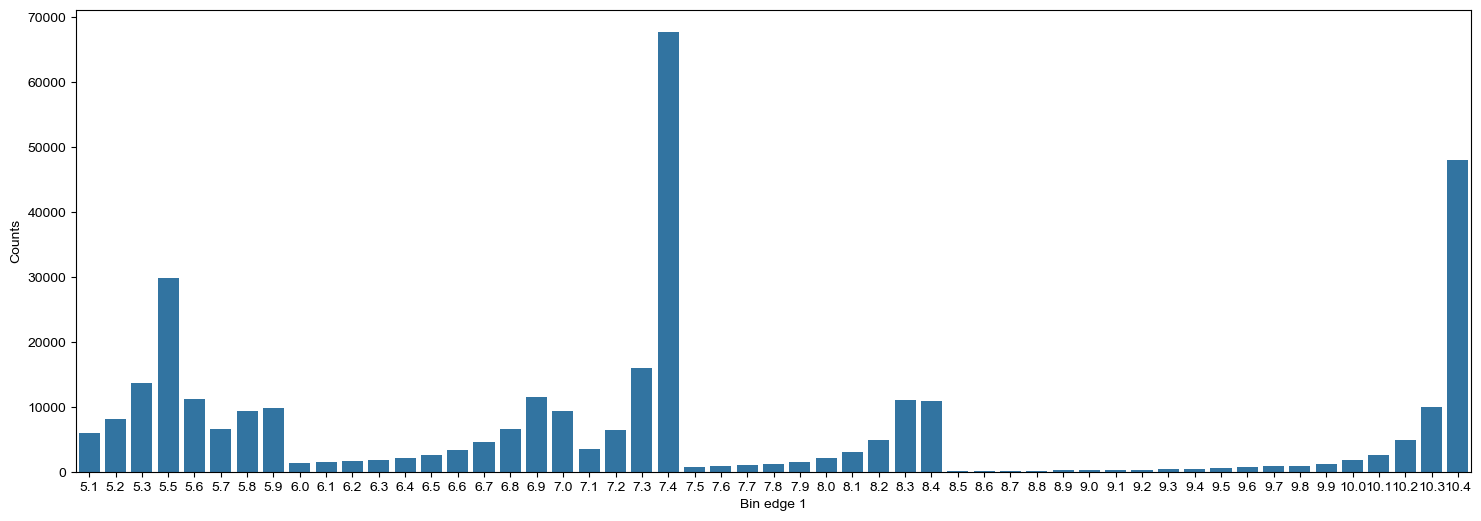

In [34]:
fig, ax = plt.subplots(figsize=(18, 6))
df["Bin edge 1"] =  np.round(df["Bin edge 1"].astype(float), 1)
sns.barplot(y = df[df["Bin edge 1"].astype(float) > 5]["Counts"], x = df[df["Bin edge 1"].astype(float) > 5]["Bin edge 1"].astype(float))

In [35]:
tot = np.sum(df[df["Bin edge 1"].astype(float) > 5]["Counts"])

cut1 = 6
cut2 = 7.5
cut3 = 12
vcons_prop_low = np.sum(df[(df["Bin edge 1"].astype(float) > 5) & (df["Bin edge 1"].astype(float) <= cut1)]["Counts"])/tot*very_cons_prop
vcons_prop_med = np.sum(df[(df["Bin edge 1"].astype(float) > cut1) & (df["Bin edge 1"].astype(float) <= cut2)]["Counts"])/tot*very_cons_prop
vcons_prop_high = np.sum(df[(df["Bin edge 1"].astype(float) > cut2) & (df["Bin edge 1"].astype(float) <= cut3)]["Counts"])/tot*very_cons_prop

In [36]:
#These will be the various lowly, mediumly, and highly conserved sites
print(vcons_prop_low, vcons_prop_med, vcons_prop_high)

0.0058047876110016465 0.008450047933958281 0.006705951544640658


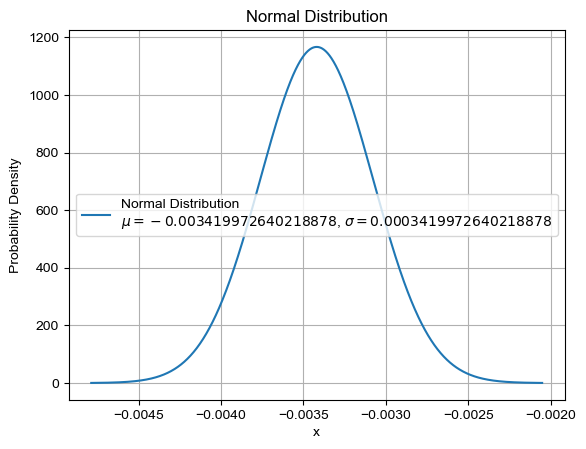

In [20]:
#Checking that they don't give negative values
vlS = 50
mu = -vlS/(2*7310)
sigma = vlS/(2*7310)/10
# Generate data points
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Plot the normal distribution
plt.plot(x, y, label=f'Normal Distribution\n$\mu={mu}$, $\sigma={sigma}$')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')
plt.legend()
plt.grid(True)
plt.show()